In [17]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

In [18]:
X, y = load_wine(return_X_y=True)
print(y)
y = y == 2 # klasyfikacja binarna

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


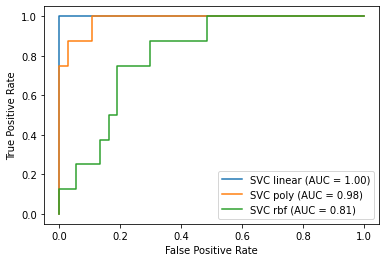

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
fig, ax = plt.subplots() 
svc = SVC(kernel='linear')    #klasyfikator
svc.fit(X_train, y_train)      # trenowanie
plot_roc_curve(svc, X_test, y_test, ax=ax, name='SVC linear')       # ocena na zbiorze testowym 
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
plot_roc_curve(svc, X_test, y_test, ax=ax, name='SVC poly')
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, y_train)
plot_roc_curve(svc1, X_test, y_test, ax=ax, name='SVC rbf')
plt.show() 

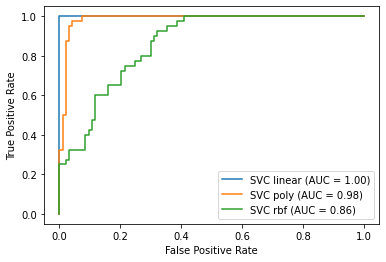

In [20]:
fig, ax = plt.subplots() 
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
plot_roc_curve(svc, X_train, y_train, ax=ax, name='SVC linear')
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
plot_roc_curve(svc, X_train, y_train, ax=ax, name='SVC poly')
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, y_train)
plot_roc_curve(svc1, X_train, y_train, ax=ax, name='SVC rbf')
plt.show() 


Accuracy (train): 0.9924812030075187
Accuracy (test): 0.9777777777777777 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.98        21
           2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45


Confusion matrix
    0   1  2
0  16   0  0
1   0  20  1
2   0   0  8

Confusion matrix - plot


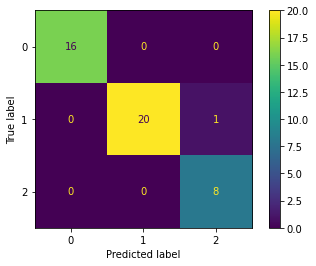

In [21]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)   # predykcja wartości zmiennej zależnej

print('\nAccuracy (train):', accuracy_score(y_train, svc.predict(X_train)))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred), '\n')

labels = np.unique(y)   # wybór unikalnych etykiet
print(classification_report(y_test, y_test_pred, labels=labels)) 

print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_test_pred)   # obliczenie macierzy pomyłek
print(pd.DataFrame(cm, index=labels, columns=labels))

print('\nConfusion matrix - plot')
pcm = plot_confusion_matrix(svc, X_test, y_test, labels=labels)
ConfusionMatrixDisplay(pcm, display_labels=labels)
plt.show() 